In [1]:
import numpy as np
import math as m
import cmath as c
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
L=[]
for i in range(0,8):
    L.append(i*10)
L

[0, 10, 20, 30, 40, 50, 60, 70]

### DFT

In [3]:
def DFT_matrix(N):
    W=c.exp(((-2*m.pi)/N)*1j)
    D=[]
    for i in range(N):
        d=[]
        for j in range(N):
            d.append(W**(i*j))
        D.append(d)
    return D

In [4]:
def IDFT_matrix(N):
    W1=c.exp(((2*m.pi)/N)*1j)
    D1=[]
    for i in range(N):
        d1=[]
        for j in range(N):
            d1.append(W1**(i*j))
        D1.append(d1)
    return D1

In [5]:
def DFT(x,D):
    X=np.matmul(D,x)
    return X

In [6]:
def IDFT(X,D1):
    x=np.matmul(D1,X)
    N=len(X)
    x=np.divide(x,N)
    return x

In [7]:
def X_m1(X,L):
    Xm1=[]
    N=len(X)
    for i in range(N):
        if i<=int((N-1-L)/2):
            Xm1.append(X[i])
        elif i>=int((N+1-L)/2) and i<=int((N-1+L)/2):
            Xm1.append(0)
        elif i>=int((N+1+L)/2) and i<=N-1:
            Xm1.append(X[i])
    return Xm1

In [8]:
def error_DFT(x,xm1):
    x=np.array(x)
    xm1=np.array(xm1)
    E1=np.mean((abs(x-xm1))**2)
    return E1

### DCT

In [9]:
def DCT(x):
    N=len(x)
    X=[]
    for i in range(N):
        t=0
        for j in range(N):
            t+=2*x[j]*np.cos(((m.pi)*i*(2*j+1))/(2*N))
        X.append(t)
    return X

In [10]:
def IDCT(X):
    N=len(X)
    x=[]
    a=[0.5]
    for i in range(N-1):
        a.append(1)
    for n in range(N):
        t=0
        for k in range(N):
            t+=a[k]*X[k]*np.cos(((m.pi)*k*(2*n+1))/(2*N))
        x.append(t/N)
    return x

In [11]:
def X_m2(X,L):
    N=len(X)
    Xm2=[]
    for i in range(N):
        if i<=(N-1-L):
            Xm2.append(X[i])
        else:
            Xm2.append(0)
    return Xm2

In [12]:
def error_DCT(x,xm2):
    x=np.array(x)
    xm2=np.array(xm2)
    E2=np.mean((abs(x-xm2))**2)
    return E2

### Haar

In [13]:
def identity_matrix(n):
    I=[]
    for i in range(n):
        k=[]
        for j in range(n):
            if i==j:
                k.append(1)
            else:
                k.append(0)
        I.append(k)
    return I

In [14]:
def haar_matrix(H,N):
    D=[]
    for i in range(N):
        d=[]
        for j in range(N):
            d.append(H[i][j])
            d.append(H[i][j])
        D.append(d)
    I=identity_matrix(N)
    N1=N**0.5
    D1=[]
    for i in range(N):
        d=[]
        for j in range(N):
            if I[i][j]!=0:
                d.append(N1*I[i][j])
                d.append(-N1*I[i][j])
            else:
                d.append(0)
                d.append(0)
        D1.append(d)
    D=D+D1
    return D

In [15]:
def v(N):
    i=0
    while N!=1:
        N=N/2
        i=i+1
    return i

In [16]:
def H_(N):
    h=[]
    h.append(1)
    h.append([[1,1],[1,-1]])
    k=v(N)
    for i in range(1,k):
        D=haar_matrix(h[i],2**i)
        h.append(D)
    return h[k]

In [17]:
def HT(H,x):
    X=np.matmul(H,x)
    return X

In [18]:
def IHT(H,X):
    N=len(X)
    k=np.array(H)
    H1=k.transpose()
    x=np.matmul(H1,X)
    x=np.divide(x,N)
    return x

In [19]:
def X_m3(X,L):
    N=len(X)
    Xm3=[]
    for i in range(N):
        if i<=(N-1-L):
            Xm3.append(X[i])
        else:
            Xm3.append(0)
    return Xm3

In [20]:
def error_HT(x,xm3):
    x=np.array(x)
    xm3=np.array(xm3)
    E3=np.mean((abs(x-xm3))**2)
    return E3

### Main

In [21]:
N=1024
x=np.random.randint(1000,size=N)
D=DFT_matrix(N)
X1=DFT(x,D)
D1=IDFT_matrix(N)
E1=[]
for i in range(0,7):
    k=L[i]
    Xm1=X_m1(X1,k)
    xm1=IDFT(Xm1,D1)
    e=error_DCT(x,xm1)
    E1.append(e)
    
X2=DCT(x)
E2=[]
for i in range(0,7):
    k=L[i]
    Xm2=X_m2(X2,k)
    xm2=IDCT(Xm2)
    e=error_DCT(x,xm2)
    E2.append(e)
   
E3=[]
H=H_(N)
X3=HT(H,x)
for i in range(0,7):
    k=L[i]
    Xm3=X_m3(X3,k)
    xm3=IHT(H,Xm3)
    e=error_DCT(x,xm3)
    E3.append(e)

In [22]:
E1

[5.9629493908516e-16,
 287.2071163020962,
 1376.774919672067,
 2242.1181782083363,
 2921.4214608441484,
 3856.406163320057,
 4293.634166382183]

In [23]:
E2

[1.7894419250631677e-21,
 345.00404310364206,
 1593.5583060580384,
 2251.2734051760144,
 2910.2654600516944,
 3928.3284572847374,
 4256.02079657936]

In [24]:
E3

[1.3104439490618852e-27,
 379.58544921875,
 1031.615234375,
 1744.12158203125,
 3116.56494140625,
 3427.41162109375,
 4075.97119140625]

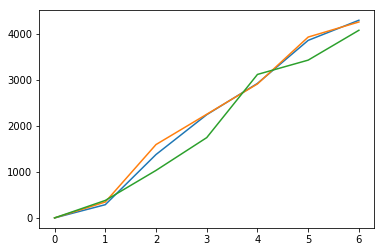

In [25]:
plt.plot(E1)
plt.plot(E2)
plt.plot(E3)